In [1]:
import pandas as pd
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
from PIL import Image
import requests
from more_itertools import pairwise

In [2]:
#загрузка датасетов
b_games = pd.read_feather('bgg_boardgames_top_2000.feather')
ratings = pd.read_feather('bgg_ratings_top_2000.feather')

===== Board Games =====
====================

boardgame_id - board game id <br>
title - title of board game <br>
year_published - year of publication of the board game <br>
minplayers - minimum number of players per game <br>
maxplayers - maximum number of players per game <br>
minplaytime - minimum playing time per game <br>
maxplaytime - maximum playing time per game <br>
age - lower age limit for playing <br>
users_rated - number of users who rated a game <br>
average_rating - average rating <br>
bayes_average_rating - bayes average rating <br>
median - median rating <br>
stddev - standard deviation of rating <br>
owned - number of users who have a game <br>
trading - number of users who selling a game <br>
wishing - number of users who want to get a game <br>
num_of_comments - number of comments <br>
num_of_weights - number of scores for weight <br>
average_weight - average weight of game <br>
ranks - game ranks <br>
main_publisher - main publisher <br>
description - description of the game <br>
publishers - all publishers <br>
honors - all honors <br>
expansions - all expansions <br>
accessories - all accessories <br>
artists - all artists <br>
mechanics - used mechanics <br>
category - category ща пфьуы <br>
designers - all designers <br>
graphic_designers - all graphic designers <br>
subdomains - subdomains of categories <br>
implementations - all implementations <br>
suggested_numplayers - proposed number of players <br>
podcast_episodes - all podcast episodes <br>
comments - some comments <br>
marketplace_history - marketplace history <br>
thumbnail_link - thumbnail link <br>
image_link - image link <br>

===== Ratings =====
================

nickname - user's nickname <br>
title - title of the game <br>
boardgame_id - id of the board game <br>
rating - given rating <br>
num_of_plays - number of games played by the user <br>
comment - comment fot rating <br>
own - flag whether the user owns the game <br>
prevowned - flag of whether the user has previously owned the game <br>
fortrade - flag whether the user is selling the game <br>
want - flag whether the user want the game <br>
wanttoplay - flag whether the user want to play the game <br>
wanttobuy - flag whether the user want to buy the game <br>
wishlist - flag whether the user have the game in wishlist <br>
preordered - flag whether the user preordered the game <br>
last_modified - date of last modification <br>

## Предобработка

In [3]:
b_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   boardgame_id          1999 non-null   int32  
 1   title                 1999 non-null   object 
 2   year_published        1999 non-null   Int16  
 3   minplayers            1999 non-null   Int8   
 4   maxplayers            1999 non-null   Int16  
 5   minplaytime           1999 non-null   Int32  
 6   maxplaytime           1999 non-null   Int32  
 7   age                   1999 non-null   Int16  
 8   users_rated           1999 non-null   Int32  
 9   average_rating        1999 non-null   float32
 10  bayes_average_rating  1999 non-null   float32
 11  median                1999 non-null   float32
 12  stddev                1999 non-null   float32
 13  owned                 1999 non-null   Int32  
 14  trading               1999 non-null   Int16  
 15  wishing              

In [4]:
#удаляем столбец, где слишком мало значений
b_games.drop('graphic_designers', axis = 1, inplace=True)

In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003471 entries, 0 to 1003470
Data columns (total 15 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   nickname       1003471 non-null  object 
 1   title          1003471 non-null  object 
 2   boardgame_id   1003471 non-null  int64  
 3   rating         1003402 non-null  float64
 4   num_of_plays   1003471 non-null  int64  
 5   comment        263604 non-null   object 
 6   own            1003471 non-null  int64  
 7   prevowned      1003471 non-null  int64  
 8   fortrade       1003471 non-null  int64  
 9   want           1003471 non-null  int64  
 10  wanttoplay     1003471 non-null  int64  
 11  wanttobuy      1003471 non-null  int64  
 12  wishlist       1003471 non-null  int64  
 13  preordered     1003471 non-null  int64  
 14  last_modified  1003471 non-null  object 
dtypes: float64(1), int64(10), object(4)
memory usage: 114.8+ MB


In [6]:
b_games.head()

,boardgame_id,title,year_published,minplayers,maxplayers,minplaytime,maxplaytime,age,users_rated,average_rating,...,category,designers,subdomains,implementations,suggested_numplayers,podcast_episodes,comments,marketplace_history,thumbnail_link,image_link
0,77423,The Lord of the Rings: The Card Game,2011,1,2,30,60,13,23231,7.66006,...,Adventure|Card Game|Collectible Components|Fan...,Nate French,Customizable Games,The Lord of the Rings: The Card Game – Revised...,1||Best~221|Recommended~368|Not Recommended~45...,005 – Emergent Narrative &amp; Storytelling in...,"0 1 1 2 3 5 8|Recommended by Joel D., Chris S....",unix_saledate|1301347058||saletime|120837||pri...,https://cf.geekdo-images.com/ZmXi5BbtoWl58ZnKc...,https://cf.geekdo-images.com/ZmXi5BbtoWl58ZnKc...
1,88,Torres,1999,2,4,60,60,12,9398,7.09677,...,Abstract Strategy|Medieval,Michael Kiesling|Wolfgang Kramer,Abstract Games|Strategy Games,Torres Family|Burgenland,1||Best~0|Recommended~0|Not Recommended~71|||2...,"BGTG 115 - Spiel des Jahres, Then &amp; Now|BG...",-Johnny-|One play. Didn't do it for me at all....,unix_saledate|1047560215||saletime|9025580||pr...,https://cf.geekdo-images.com/3pL0cEnaGn7Qwn6F2...,https://cf.geekdo-images.com/3pL0cEnaGn7Qwn6F2...
2,203420,Exit: The Game – The Abandoned Cabin,2016,1,6,60,120,12,10691,7.45508,...,Deduction|Puzzle|Real-time,Inka Brand|Markus Brand,Family Games|Thematic Games,None,1||Best~6|Recommended~79|Not Recommended~38|||...,"34. Devon Dice Podcast, Near &amp; Far, Dice F...",-Johnny-|Not actually a game. More of an activ...,unix_saledate|1488266932||saletime|992349||pri...,https://cf.geekdo-images.com/r7cZVZMpP28w3-JQ-...,https://cf.geekdo-images.com/r7cZVZMpP28w3-JQ-...
3,310448,Zombie Teenz Evolution,2020,2,4,15,25,8,1321,7.78381,...,Children's Game|Zombies,Annick Lobet,Family Games,Zombie Kidz Evolution,1||Best~0|Recommended~4|Not Recommended~8|||2|...,"Episode 112 - Bonfire, Hostage Negotiator, Aeo...","21kellie08|Jackson’s||Adam78|I went into this,...",unix_saledate|1608485820||saletime|1710444||pr...,https://cf.geekdo-images.com/elS-EEtVF92Vk-YBq...,https://cf.geekdo-images.com/elS-EEtVF92Vk-YBq...
4,25417,BattleLore,2006,2,2,60,60,10,9264,7.35379,...,Fantasy|Medieval|Miniatures|Wargame,Richard Borg,Thematic Games|Wargames,BattleLore: Second Edition|Battles of Westeros,1||Best~2|Recommended~10|Not Recommended~90|||...,BGWS 035 – BattleLore|D6G Episode 13: Battlelo...,1000rpm|Rating based on 3 plays of the most ba...,unix_saledate|1165637847||saletime|445093||pri...,https://cf.geekdo-images.com/cAH5iJ9gQ7aAj4iwU...,https://cf.geekdo-images.com/cAH5iJ9gQ7aAj4iwU...


In [7]:
ratings.head()

,nickname,title,boardgame_id,rating,num_of_plays,comment,own,prevowned,fortrade,want,wanttoplay,wanttobuy,wishlist,preordered,last_modified
0,happyjosiah,5-Minute Dungeon,207830,7.0,2,"Like it says on the label, it's a dungeon-craw...",0,0,0,0,0,0,0,0,2019-03-11 13:02:09
1,happyjosiah,6 nimmt!,432,7.0,8,A really solid addition to any game collection...,0,0,0,0,0,0,0,0,2019-10-04 11:16:41
2,happyjosiah,7 Wonders,68448,8.0,41,"While ostensibly a game of card drafting, 7 Wo...",1,0,0,0,0,0,0,0,2012-12-31 10:47:48
3,happyjosiah,7 Wonders Duel,173346,5.0,1,"Rated after one play, but was pretty disappoin...",0,0,0,0,0,0,0,0,2018-03-19 12:58:55
4,happyjosiah,Acquire,5,9.0,11,With a theme of corporate America and a bland-...,1,0,0,0,0,0,0,0,2020-07-22 12:35:58


In [8]:
#выделяем вещественные и категориальные фичи
numeric_columns = ratings.select_dtypes(exclude='object').columns
categorical_columns = ratings.select_dtypes(include='object').columns

In [9]:
#заменим пропуски в вещественных признаках медианой, а в категориальных - самым популярным классом
for col in numeric_columns:
    ratings[col] = ratings[col].fillna(ratings[col].median())
for col in categorical_columns:
    ratings[col] = ratings[col].fillna(ratings[col].mode().iloc[0])

In [10]:
#эта функция проверяет корреляцию признаков
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [11]:
#корреляция признаков в таблице взаимодействий
print("Top Absolute Correlations")
print(round(get_top_abs_correlations(ratings[numeric_columns]), 5))


Top Absolute Correlations
rating     own          0.40512
own        prevowned    0.33106
want       wanttobuy    0.28376
           wishlist     0.25559
wanttobuy  wishlist     0.19017
dtype: float64


In [12]:
#преобразуем столбец с датой в формат datetime
ratings['last_modified'] = pd.to_datetime(ratings['last_modified'])

In [13]:
#меняем название столбцов для упрощения вычислений
ratings.rename(columns={'nickname': 'user_id','boardgame_id':'item_id'}, inplace=True)

In [14]:
#функция, которая выдаст нам датасет с топ-N рекомендациями. Это будет наш бейзлайн.
def popular_games(df,n=10):
    rating_count=df.loc[:, ['boardgame_id','users_rated']]
    rating_average=df.loc[:, ['boardgame_id','average_rating']]
    
    popularGames=rating_count.merge(rating_average,on="boardgame_id")
    
    def weighted_rate(x):
        v=x["users_rated"]
        R=x["average_rating"]
        
        return ((v*R) + (m*C)) / (v+m)
    
    C=popularGames["average_rating"].mean()
    m=popularGames["users_rated"].quantile(0.90)
    
    popularGames=popularGames[popularGames["users_rated"] >=250]
    popularGames["Popularity"]=popularGames.apply(weighted_rate,axis=1)
    popularGames=popularGames.sort_values(by="Popularity",ascending=False)
    return popularGames[["boardgame_id","users_rated","average_rating","Popularity"]].reset_index(drop=True).head(n)

In [15]:
recs_top10 = pd.DataFrame(popular_games(b_games,10))
recs_top10 = pd.merge(recs_top10, b_games.loc[:, ['boardgame_id', 'title', 'image_link']], on='boardgame_id')
recs_top10.to_csv('top-10.csv')

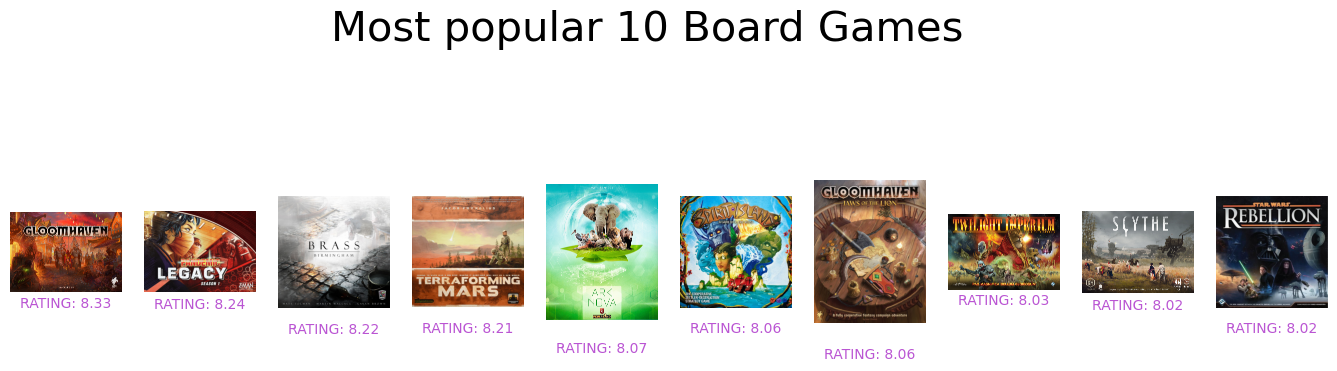

In [16]:
#вводим топ-10, показываем рейтинг и обложки игр

fig,ax=plt.subplots(1,10,figsize=(17,5))
fig.suptitle("Most popular 10 Board Games",fontsize=30,color="black")
for i in range(len(recs_top10["boardgame_id"])):
    url=recs_top10.iloc[i, 5] #5 столбец - это image_link
    img=Image.open(requests.get(url,stream=True).raw)
    ax[i].imshow(img)
    ax[i].axis("off")
    ax[i].set_title((f'RATING: {round(recs_top10["Popularity"][i], 2)}'),
                    y=-0.3,
                    color="mediumorchid",
                    fontsize=10)

## Валидация

In [17]:
#Для наших данных выбрем 60 последних дней и будем тестировать на них последовательно (1 test fold - 1 день).

class TimeRangeSplit():

    def __init__(self, 
                 start_date, 
                 end_date=None, 
                 freq='D', 
                 periods=None, 
                 tz=None, 
                 normalize=False, 
                 closed=None, 
                 train_min_date=None,
                 filter_cold_users=True, 
                 filter_cold_items=True, 
                 filter_already_seen=True):
        
        self.start_date = start_date
        if end_date is None and periods is None:
            raise ValueError("Either 'end_date' or 'periods' must be non-zero, not both at the same time.")

        self.end_date = end_date
        self.freq = freq
        self.periods = periods
        self.tz = tz
        self.normalize = normalize
        self.closed = closed
        self.train_min_date = pd.to_datetime(train_min_date, errors='raise')
        self.filter_cold_users = filter_cold_users
        self.filter_cold_items = filter_cold_items
        self.filter_already_seen = filter_already_seen

        self.date_range = pd.date_range(
            start=start_date, 
            end=end_date, 
            freq=freq, 
            periods=periods, 
            tz=tz, 
            normalize=normalize, 
            closed=closed)

        self.max_n_splits = max(0, len(self.date_range) - 1)
        if self.max_n_splits == 0:
            raise ValueError("Provided parametrs set an empty date range.") 

    def split(self, 
              df, 
              user_column='user_id',
              item_column='item_id',
              datetime_column='date',
              fold_stats=False):
        df_datetime = df[datetime_column]
        if self.train_min_date is not None:
            train_min_mask = df_datetime >= self.train_min_date
        else:
            train_min_mask = df_datetime.notnull()

        date_range = self.date_range[(self.date_range >= df_datetime.min()) & 
                                     (self.date_range <= df_datetime.max())]

        for start, end in pairwise(date_range):
            fold_info = {
                'Start date': start,
                'End date': end
            }
            train_mask = train_min_mask & (df_datetime < start)
            train_idx = df.index[train_mask]
            if fold_stats:
                fold_info['Train'] = len(train_idx)

            test_mask = (df_datetime >= start) & (df_datetime < end)
            test_idx = df.index[test_mask]
            
            if self.filter_cold_users:
                new = np.setdiff1d(
                    df.loc[test_idx, user_column].unique(), 
                    df.loc[train_idx, user_column].unique())
                new_idx = df.index[test_mask & df[user_column].isin(new)]
                test_idx = np.setdiff1d(test_idx, new_idx)
                test_mask = df.index.isin(test_idx)
                if fold_stats:
                    fold_info['New users'] = len(new)
                    fold_info['New users interactions'] = len(new_idx)

            if self.filter_cold_items:
                new = np.setdiff1d(
                    df.loc[test_idx, item_column].unique(), 
                    df.loc[train_idx, item_column].unique())
                new_idx = df.index[test_mask & df[item_column].isin(new)]
                test_idx = np.setdiff1d(test_idx, new_idx)
                test_mask = df.index.isin(test_idx)
                if fold_stats:
                    fold_info['New items'] = len(new)
                    fold_info['New items interactions'] = len(new_idx)

            if self.filter_already_seen:
                user_item = [user_column, item_column]
                train_pairs = df.loc[train_idx, user_item].set_index(user_item).index
                test_pairs = df.loc[test_idx, user_item].set_index(user_item).index
                intersection = train_pairs.intersection(test_pairs)
                test_idx = test_idx[~test_pairs.isin(intersection)]
                # test_mask = rd.df.index.isin(test_idx)
                if fold_stats:
                    fold_info['Known interactions'] = len(intersection)

            if fold_stats:
                fold_info['Test'] = len(test_idx)

            yield (train_idx, test_idx, fold_info)

    def get_n_splits(self, df, datetime_column='date'):
        df_datetime = df[datetime_column]
        if self.train_min_date is not None:
            df_datetime = df_datetime[df_datetime >= self.train_min_date]

        date_range = self.date_range[(self.date_range >= df_datetime.min()) & 
                                     (self.date_range <= df_datetime.max())]

        return max(0, len(date_range) - 1)

In [18]:
last_date = ratings['last_modified'].max().normalize() 
folds = 60
start_date = last_date - pd.Timedelta(days=folds)
start_date, last_date

(Timestamp('2022-12-08 00:00:00'), Timestamp('2023-02-06 00:00:00'))

In [19]:
cv = TimeRangeSplit(start_date=start_date, periods=folds+1)

cv.max_n_splits, cv.get_n_splits(ratings, datetime_column='last_modified')

/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_58094/4025761528.py:33: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  self.date_range = pd.date_range(


(60, 60)

In [20]:
cv.date_range

DatetimeIndex(['2022-12-08', '2022-12-09', '2022-12-10', '2022-12-11',
               '2022-12-12', '2022-12-13', '2022-12-14', '2022-12-15',
               '2022-12-16', '2022-12-17', '2022-12-18', '2022-12-19',
               '2022-12-20', '2022-12-21', '2022-12-22', '2022-12-23',
               '2022-12-24', '2022-12-25', '2022-12-26', '2022-12-27',
               '2022-12-28', '2022-12-29', '2022-12-30', '2022-12-31',
               '2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29', '2023-01-30', '2023-01-31', '2023-02-01',
      

In [21]:
folds_with_stats = list(cv.split(
    ratings, 
    user_column='user_id',
    item_column='item_id',
    datetime_column='last_modified',
    fold_stats=True
))

folds_info_with_stats = pd.DataFrame([info for _, _, info in folds_with_stats])

In [22]:
fold_dates = [(info['Start date'], info['End date']) for _, _, info in folds_with_stats]
fold_dates

[(Timestamp('2022-12-08 00:00:00', freq='D'),
  Timestamp('2022-12-09 00:00:00', freq='D')),
 (Timestamp('2022-12-09 00:00:00', freq='D'),
  Timestamp('2022-12-10 00:00:00', freq='D')),
 (Timestamp('2022-12-10 00:00:00', freq='D'),
  Timestamp('2022-12-11 00:00:00', freq='D')),
 (Timestamp('2022-12-11 00:00:00', freq='D'),
  Timestamp('2022-12-12 00:00:00', freq='D')),
 (Timestamp('2022-12-12 00:00:00', freq='D'),
  Timestamp('2022-12-13 00:00:00', freq='D')),
 (Timestamp('2022-12-13 00:00:00', freq='D'),
  Timestamp('2022-12-14 00:00:00', freq='D')),
 (Timestamp('2022-12-14 00:00:00', freq='D'),
  Timestamp('2022-12-15 00:00:00', freq='D')),
 (Timestamp('2022-12-15 00:00:00', freq='D'),
  Timestamp('2022-12-16 00:00:00', freq='D')),
 (Timestamp('2022-12-16 00:00:00', freq='D'),
  Timestamp('2022-12-17 00:00:00', freq='D')),
 (Timestamp('2022-12-17 00:00:00', freq='D'),
  Timestamp('2022-12-18 00:00:00', freq='D')),
 (Timestamp('2022-12-18 00:00:00', freq='D'),
  Timestamp('2022-12-19 

In [23]:
#Делаем датасет с рекомендациями популярного. Это нам поднадобится для расчета метрик
recs_baseline = pd.DataFrame({'user_id': ratings['user_id'].unique()})
recs_baseline['item_id'] = [list(recs_top10['boardgame_id'].values) for i in range(len(recs_baseline))]
recs_baseline

,user_id,item_id
0,happyjosiah,"[174430, 161936, 224517, 167791, 342942, 16288..."
1,asaarto,"[174430, 161936, 224517, 167791, 342942, 16288..."
2,Christine Biancheria,"[174430, 161936, 224517, 167791, 342942, 16288..."
3,bitatmoonl,"[174430, 161936, 224517, 167791, 342942, 16288..."
4,DrGrayrock,"[174430, 161936, 224517, 167791, 342942, 16288..."
...,...,...
1627,lyxhope,"[174430, 161936, 224517, 167791, 342942, 16288..."
1628,Knecht Ruprecht,"[174430, 161936, 224517, 167791, 342942, 16288..."
1629,mac_s_1,"[174430, 161936, 224517, 167791, 342942, 16288..."
1630,marco27,"[174430, 161936, 224517, 167791, 342942, 16288..."


In [24]:
#разбиваем на тест и трейн
train_idx, test_idx, info = folds_with_stats[0]

train = ratings.loc[train_idx]
test = ratings.loc[test_idx]
train.shape, test.shape

((988378, 15), (469, 15))

In [25]:
#дополнительные вычестления для расчета метрики
recs_baseline = recs_baseline.explode('item_id')
recs_baseline['rank'] = recs_baseline.groupby('user_id').cumcount() + 1
test_recs_baseline = test.set_index(['user_id', 'item_id']).join(recs_baseline.set_index(['user_id', 'item_id']))
test_recs_baseline = test_recs_baseline.sort_values(by=['user_id', 'rank'])
test_recs_baseline['users_item_count'] = test_recs_baseline.groupby(level='user_id', sort=False)['rank'].transform(np.size)
test_recs_baseline['reciprocal_rank'] = 1 / test_recs_baseline['rank']
test_recs_baseline['reciprocal_rank'] = test_recs_baseline['reciprocal_rank'].fillna(0)
test_recs_baseline['cumulative_rank'] = test_recs_baseline.groupby(level='user_id').cumcount() + 1
test_recs_baseline['cumulative_rank'] = test_recs_baseline['cumulative_rank'] / test_recs_baseline['rank']

In [26]:
#Рассчитываем метрики для бейзлайна. Ориентируемся на MAP
top_N = 10
result = {}
print('Метрики для бейзлайна')
users_count = test_recs_baseline.index.get_level_values('user_id').nunique()
for k in range(1, top_N + 1):
    hit_k = f'hit@{k}'
    test_recs_baseline[hit_k] = test_recs_baseline['rank'] <= k
    result[f'Precision@{k}'] = (test_recs_baseline[hit_k] / k).sum() / users_count
    result[f'Recall@{k}'] = (test_recs_baseline[hit_k] / test_recs_baseline['users_item_count']).sum() / users_count

result[f'MAP@{top_N}'] = (test_recs_baseline["cumulative_rank"] / test_recs_baseline["users_item_count"]).sum() / users_count
result[f'MRR'] = test_recs_baseline.groupby(level='user_id')['reciprocal_rank'].max().mean()

result = pd.Series(result)

print(result)

Метрики для бейзлайна
Precision@1     0.006711
Recall@1        0.003356
Precision@2     0.006711
Recall@2        0.003478
Precision@3     0.006711
Recall@3        0.004596
Precision@4     0.005034
Recall@4        0.004596
Precision@5     0.005369
Recall@5        0.007952
Precision@6     0.004474
Recall@6        0.007952
Precision@7     0.004794
Recall@7        0.008074
Precision@8     0.004195
Recall@8        0.008074
Precision@9     0.003729
Recall@9        0.008074
Precision@10    0.004027
Recall@10       0.008196
MAP@10          0.004532
MRR             0.013647
dtype: float64


## Подбираем лучшую модель

### Implicit модели CosineRecommender, BM25Recommender, TFIDFRecommender

In [27]:
#делаем словарь "user-порядковый номер"
users_inv_mapping = dict(enumerate(ratings['user_id'].unique()))
users_mapping = {v: k for k, v in users_inv_mapping.items()}
len(users_mapping)

1632

In [28]:
#такой же словарь "item-порядковый номер айтема"
items_inv_mapping = dict(enumerate(ratings['item_id'].unique()))
items_mapping = {v: k for k, v in items_inv_mapping.items()}
len(items_mapping)

1999

In [29]:
#приводим названия игр к нижнему регистру
ratings['title'] = ratings['title'].str.lower()
b_games['title'] = b_games['title'].str.lower()

In [30]:
#создаем словарь c item_id-title
item_titles = pd.Series(ratings['title'].values, index=ratings['item_id']).to_dict()
len(item_titles), item_titles[432]

(1999, '6 nimmt!')

In [31]:
#в данной ячейке наоборот - название игры это индекс и в значениях номера item_id
#(item_id для нескольких разных title может быть одинаковое, т.к. названия на разных языках)
title_items = ratings.groupby('title')['item_id'].agg(list)
title_items

title
 珊瑚礁大戰                                                                       [12962]
'ολου του κόσμου τα αγαθά                                                   [183840]
0-9                                [217449, 217449, 217449, 217449, 217449, 21744...
01: большой пожар                                                           [100901]
1 nacht weerwolven & waaghalzen    [147949, 147949, 147949, 147949, 147949, 14794...
                                                         ...                        
할리우드 골든 에이지                                                                    [904]
해저탐험                                                                [169654, 169654]
화이트채플에서 온 편지                                                          [59959, 59959]
황금의 땅 엘도라도                                                                  [217372]
황혼의 투쟁                                                                [12333, 12333]
Name: item_id, Length: 8576, dtype: object

In [32]:
title_count = title_items.map(len)
title_count.value_counts()

1       2961
2        938
3        514
4        345
5        237
        ... 
469        1
1108       1
790        1
345        1
963        1
Name: item_id, Length: 969, dtype: int64

In [33]:
title_items[title_count > 1].head()

title
0-9                                          [217449, 217449, 217449, 217449, 217449, 21744...
1 nacht weerwolven & waaghalzen              [147949, 147949, 147949, 147949, 147949, 14794...
1 nacht weerwolven & waaghalzen: dageraad                     [163166, 163166, 163166, 163166]
100000 лет до нашей эры                                           [34635, 34635, 34635, 34635]
13 days: the cuban missile crisis, 1962      [177590, 177590, 177590, 177590, 177590, 17759...
Name: item_id, dtype: object

In [34]:
ratings['rating'] = np.array(ratings['rating'].values, dtype=np.float32)

ratings.loc[ratings['item_id'].isin([217449, 163166])].groupby('item_id').agg({
    'own': np.sum,
    'prevowned': np.sum,
    'fortrade': np.sum,
    'want': np.sum,
    'wanttoplay': np.sum,
    'wanttobuy': np.sum,
    'wishlist': np.sum,
    'preordered': np.sum,
    'rating': ['mean'],
    'last_modified': ['min', 'max'],
    
})


own prevowned fortrade want wanttoplay wanttobuy wishlist preordered  \
         sum       sum      sum  sum        sum       sum      sum        sum   
item_id                                                                         
163166   138        32        4    1          5         0        7          0   
217449   284       107        9    4          8         0       11          2   

           rating       last_modified                      
             mean                 min                 max  
item_id                                                    
163166   6.878872 2014-10-10 16:06:44 2023-02-05 08:56:00  
217449   6.534010 2017-02-03 03:28:28 2023-01-24 10:05:32

In [35]:
#функция, которая считает метрики
def compute_metrics(df_true, df_pred, top_N):
    result = {}
    test_recs = df_true.set_index(['user_id', 'item_id']).join(df_pred.set_index(['user_id', 'item_id']))
    test_recs = test_recs.sort_values(by=['user_id', 'rank'])

    test_recs['users_item_count'] = test_recs.groupby(level='user_id')['rank'].transform(np.size)
    test_recs['reciprocal_rank'] = (1 / test_recs['rank']).fillna(0)
    test_recs['cumulative_rank'] = test_recs.groupby(level='user_id').cumcount() + 1
    test_recs['cumulative_rank'] = test_recs['cumulative_rank'] / test_recs['rank']
    
    users_count = test_recs.index.get_level_values('user_id').nunique()
    for k in range(1, top_N + 1):
        hit_k = f'hit@{k}'
        test_recs[hit_k] = test_recs['rank'] <= k
        result[f'Precision@{k}'] = (test_recs[hit_k] / k).sum() / users_count
        result[f'Recall@{k}'] = (test_recs[hit_k] / test_recs['users_item_count']).sum() / users_count

    result[f'MAP@{top_N}'] = (test_recs["cumulative_rank"] / test_recs["users_item_count"]).sum() / users_count
    result[f'MRR'] = test_recs.groupby(level='user_id')['reciprocal_rank'].max().mean()
    return pd.Series(result)

In [36]:
#функция, которая генерирует разреженную матрицу в формате координат (для обучения)
def get_coo_matrix(df, 
                   user_col='user_id', 
                   item_col='item_id', 
                   weight_col=None, 
                   users_mapping=users_mapping, 
                   items_mapping=items_mapping):
    if weight_col is None:
        weights = np.ones(len(df), dtype=np.float32)
    else:
        weights = df[weight_col].astype(np.float32)

    interaction_matrix = sp.coo_matrix((
        weights, 
        (
            df[user_col].map(users_mapping.get), 
            df[item_col].map(items_mapping.get)
        )
    ))
    return interaction_matrix

In [37]:
from sklearn.preprocessing import normalize
train_mat = normalize(get_coo_matrix(train).tocsr())
train_mat

<1632x1999 sparse matrix of type '<class 'numpy.float32'>'
	with 978083 stored elements in Compressed Sparse Row format>

In [38]:
from implicit.nearest_neighbours import CosineRecommender, BM25Recommender, TFIDFRecommender

In [39]:
cosine_model = CosineRecommender(K=20)
cosine_model.fit(train_mat)

/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00860595703125 seconds
  warnings.warn(


  0%|          | 0/1999 [00:00<?, ?it/s]

In [40]:
#тестовый пользователь
top_N = 10
user_id = test['user_id'].iloc[0]
row_id = users_mapping[user_id]
print(f'Рекомендации для пользователя {user_id}, номер строки - {row_id}')

Рекомендации для пользователя DrGrayrock, номер строки - 4


In [41]:
#рекомендации для тестового пользователя
recs = cosine_model.recommend(row_id, train_mat[row_id], N=top_N, filter_already_liked_items=True)
recs = pd.DataFrame(recs).T.rename(columns = {0: 'col_id', 1: 'similarity'})
recs

,col_id,similarity
0,236.0,1.812226
1,182.0,0.702535
2,623.0,0.682942
3,134.0,0.672612
4,349.0,0.459971
5,21.0,0.306308
6,528.0,0.304146
7,1152.0,0.270746
8,556.0,0.262924
9,23.0,0.255916


In [42]:
recs['item_id'] = recs['col_id'].map(items_inv_mapping.get)
recs['title'] = recs['item_id'].map(item_titles.get)
recs

,col_id,similarity,item_id,title
0,236.0,1.812226,50,lost cities
1,182.0,0.702535,43015,hansa teutonica
2,623.0,0.682942,122515,keyflower
3,134.0,0.672612,503,through the desert
4,349.0,0.459971,8125,santiago
5,21.0,0.306308,342942,ark nova
6,528.0,0.304146,209685,century: spice road
7,1152.0,0.270746,12962,reef encounter
8,556.0,0.262924,62219,dominant species
9,23.0,0.255916,15987,arkham horror


In [43]:
#функция для генерации рекомендаций, понадобится нам для расчета метрик
def generate_implicit_recs_mapper(model, train_matrix, N, user_mapping, item_inv_mapping):
    def _recs_mapper(user):
        user_id = user_mapping[user]
        recs = model.recommend(user_id, 
                               train_matrix[user_id], 
                               N=N, 
                               filter_already_liked_items=True)
        return [item_inv_mapping[item] for item in recs[0]]
    return _recs_mapper

In [44]:
mapper = generate_implicit_recs_mapper(cosine_model, train_mat, top_N, users_mapping, items_inv_mapping)
mapper

<function __main__.generate_implicit_recs_mapper.<locals>._recs_mapper(user)>

In [45]:
%time
recs_cosine = pd.DataFrame({
    'user_id': test['user_id'].unique()
})
recs_cosine['item_id'] = recs_cosine['user_id'].map(mapper)
recs_cosine.head()

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 7.87 µs


,user_id,item_id
0,DrGrayrock,"[50, 43015, 122515, 503, 8125, 342942, 209685,..."
1,grasa_total,"[3076, 167791, 2651, 822, 13, 478, 18602, 2959..."
2,Dugy,"[110327, 9209, 478, 475, 177736, 5782, 13642, ..."
3,jim knopf,"[157354, 173346, 50, 54043, 25554, 22345, 2179..."
4,JT19,"[126163, 31260, 132531, 164928, 122515, 21790,..."


In [46]:
recs_cosine = recs_cosine.explode('item_id')
recs_cosine['rank'] = recs_cosine.groupby('user_id').cumcount() + 1
recs_cosine.head(top_N + 2)

,user_id,item_id,rank
0,DrGrayrock,50,1
0,DrGrayrock,43015,2
0,DrGrayrock,122515,3
0,DrGrayrock,503,4
0,DrGrayrock,8125,5
0,DrGrayrock,342942,6
0,DrGrayrock,209685,7
0,DrGrayrock,12962,8
0,DrGrayrock,62219,9
0,DrGrayrock,15987,10


In [47]:
#расчет метрик для модели с обычным косинусным расстоянием
metrics = compute_metrics(test, recs_cosine, top_N)
metrics

Precision@1     0.060403
Recall@1        0.022898
Precision@2     0.050336
Recall@2        0.040981
Precision@3     0.046980
Recall@3        0.062356
Precision@4     0.040268
Recall@4        0.067136
Precision@5     0.034899
Recall@5        0.068935
Precision@6     0.033557
Recall@6        0.082785
Precision@7     0.031640
Recall@7        0.090135
Precision@8     0.033557
Recall@8        0.109629
Precision@9     0.032066
Recall@9        0.112548
Precision@10    0.030872
Recall@10       0.120218
MAP@10          0.050288
MRR             0.096791
dtype: float64

In [48]:
#запишем результаты расчета метрик в датафрейм для того, чтобы сделать общую таблицу сравнений
validation_results = pd.DataFrame()

for train_idx, test_idx, info in folds_with_stats:
    #print(f"test range - from {info['Start date']} to {info['End date']}")
    train = ratings.loc[train_idx]
    test = ratings.loc[test_idx]
    #print(f'train shape - {train.shape}, test shape - {test.shape}')
    
    recs_baseline = pd.DataFrame({'user_id': ratings['user_id'].unique()})
    recs_baseline['item_id'] = [list(recs_top10['boardgame_id'].values) for i in range(len(recs_baseline))]
    recs_baseline = recs_baseline.explode('item_id')
    recs_baseline['rank'] = recs_baseline.groupby('user_id').cumcount() + 1
    fold_result = compute_metrics(test, recs_baseline, top_N)
    fold_result.at['Date'] = info['Start date']
    fold_result.at['argv'] = 'none'
    fold_result.at['Model'] = 'baseline'
    validation_results = pd.concat([validation_results, fold_result], axis = 1, ignore_index=True)

In [49]:
validation_results.T

,Precision@1,Recall@1,Precision@2,Recall@2,Precision@3,Recall@3,Precision@4,Recall@4,Precision@5,Recall@5,...,Recall@8,Precision@9,Recall@9,Precision@10,Recall@10,MAP@10,MRR,Date,argv,Model
0,0.006711,0.003356,0.006711,0.003478,0.006711,0.004596,0.005034,0.004596,0.005369,0.007952,...,0.008074,0.003729,0.008074,0.004027,0.008196,0.004532,0.013647,2022-12-08,none,baseline
1,0.0,0.0,0.0,0.0,0.00463,0.003513,0.008681,0.007491,0.009722,0.014898,...,0.021885,0.007716,0.022753,0.007639,0.023384,0.004781,0.013561,2022-12-09,none,baseline
2,0.017045,0.006245,0.014205,0.007704,0.011364,0.007768,0.011364,0.008123,0.013636,0.014475,...,0.02209,0.00947,0.02209,0.009659,0.02247,0.009839,0.030208,2022-12-10,none,baseline
3,0.00565,0.000063,0.002825,0.000063,0.003766,0.000208,0.004237,0.001621,0.014689,0.025273,...,0.036886,0.010672,0.036949,0.009605,0.036949,0.006787,0.021435,2022-12-11,none,baseline
4,0.006494,0.00026,0.00974,0.002641,0.006494,0.002641,0.00487,0.002641,0.005195,0.00329,...,0.00329,0.003608,0.003448,0.003896,0.009942,0.002247,0.015657,2022-12-12,none,baseline
5,0.0,0.0,0.0,0.0,0.002252,0.000066,0.003378,0.000132,0.006757,0.013712,...,0.013712,0.004505,0.013778,0.004054,0.013778,0.002827,0.004955,2022-12-13,none,baseline
6,0.007092,0.000709,0.003546,0.000709,0.007092,0.002031,0.007092,0.002474,0.012766,0.021595,...,0.021704,0.008668,0.021913,0.007801,0.021913,0.005149,0.021868,2022-12-14,none,baseline
7,0.007353,0.007353,0.003676,0.007353,0.002451,0.007353,0.003676,0.008578,0.004412,0.015931,...,0.016299,0.004085,0.018137,0.003676,0.018137,0.00938,0.012398,2022-12-15,none,baseline
8,0.006329,0.003165,0.003165,0.003165,0.004219,0.003239,0.003165,0.003239,0.005063,0.009643,...,0.012807,0.004219,0.019136,0.003797,0.019136,0.006092,0.010408,2022-12-16,none,baseline
9,0.005882,0.00014,0.005882,0.00098,0.003922,0.00098,0.002941,0.00098,0.004706,0.005098,...,0.022885,0.005882,0.023866,0.005294,0.023866,0.003844,0.014141,2022-12-17,none,baseline


In [50]:

#обучим три разные модели и запишем результаты в наш итоговый датафрейм с метриками

for model_class in [CosineRecommender, BM25Recommender, TFIDFRecommender]:
    for train_idx, test_idx, info in folds_with_stats:
        #print(f"test range - from {info['Start date']} to {info['End date']}")
        train = ratings.loc[train_idx]
        test = ratings.loc[test_idx]
        #print(f'train shape - {train.shape}, test shape - {test.shape}')
        
        train_mat = get_coo_matrix(train).tocsr()
        for k in [10, 20, 25, 30]:
            model = model_class(K=k)
            model.fit(train_mat, show_progress=False) 

            mapper = generate_implicit_recs_mapper(model, train_mat, top_N, users_mapping, items_inv_mapping)

            recs = pd.DataFrame({
                'user_id': test['user_id'].unique()
            })
            recs['item_id'] = recs['user_id'].map(mapper)
            recs = recs.explode('item_id')
            recs['rank'] = recs.groupby('user_id').cumcount() + 1
            fold_result = compute_metrics(test, recs, top_N)
            fold_result.at['Date'] = info['Start date']
            fold_result.at['argv'] = 'K=20'
            fold_result.at['Model'] = model.__class__.__name__

            validation_results = pd.concat([validation_results, fold_result], axis = 1, ignore_index=True)

/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008451700210571289 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008381843566894531 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008414983749389648 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008365869522094727 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/pytho

/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008462667465209961 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008486032485961914 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008373022079467773 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008378267288208008 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/pytho

/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008470773696899414 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008423089981079102 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008547067642211914 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008478879928588867 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/pytho

/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008418083190917969 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008466958999633789 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008433103561401367 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008598804473876953 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/pytho

/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008522987365722656 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008537769317626953 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008524894714355469 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008439779281616211 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/pytho

/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008565902709960938 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00857686996459961 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008442163467407227 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00849294662475586 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3

/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008634805679321289 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008591890335083008 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008553028106689453 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008610010147094727 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/pytho

/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008454322814941406 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008435964584350586 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.017859220504760742 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008521318435668945 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/pytho

/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008636951446533203 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008589982986450195 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008866071701049805 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00847482681274414 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python

/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008495807647705078 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.011995792388916016 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008547067642211914 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008524894714355469 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/pytho

/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008578777313232422 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008449077606201172 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008596181869506836 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.009449005126953125 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/pytho

/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.012108802795410156 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008435964584350586 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008616209030151367 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.011931896209716797 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/pytho

/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008587121963500977 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00854182243347168 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008598089218139648 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008645057678222656 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python

/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.012265920639038086 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.009499311447143555 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00860285758972168 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00861501693725586 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3

/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008510828018188477 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008440017700195312 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008418798446655273 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008446216583251953 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/pytho

/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008388996124267578 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00849604606628418 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008491039276123047 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008528709411621094 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python

/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00851297378540039 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008528709411621094 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008500099182128906 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008482217788696289 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python

/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008610963821411133 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008588075637817383 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008599996566772461 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008635997772216797 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/pytho

/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008567094802856445 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008599996566772461 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00850367546081543 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008466958999633789 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python

/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008477210998535156 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008512020111083984 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00849294662475586 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00857686996459961 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3

/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008467912673950195 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008563756942749023 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008470773696899414 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008627891540527344 seconds
  warnings.warn(
/Users/katerina_dracheva/opt/anaconda3/lib/pytho

In [51]:
validation_results.T

,Precision@1,Recall@1,Precision@2,Recall@2,Precision@3,Recall@3,Precision@4,Recall@4,Precision@5,Recall@5,...,Recall@8,Precision@9,Recall@9,Precision@10,Recall@10,MAP@10,MRR,Date,argv,Model
0,0.006711,0.003356,0.006711,0.003478,0.006711,0.004596,0.005034,0.004596,0.005369,0.007952,...,0.008074,0.003729,0.008074,0.004027,0.008196,0.004532,0.013647,2022-12-08,none,baseline
1,0.0,0.0,0.0,0.0,0.00463,0.003513,0.008681,0.007491,0.009722,0.014898,...,0.021885,0.007716,0.022753,0.007639,0.023384,0.004781,0.013561,2022-12-09,none,baseline
2,0.017045,0.006245,0.014205,0.007704,0.011364,0.007768,0.011364,0.008123,0.013636,0.014475,...,0.02209,0.00947,0.02209,0.009659,0.02247,0.009839,0.030208,2022-12-10,none,baseline
3,0.00565,0.000063,0.002825,0.000063,0.003766,0.000208,0.004237,0.001621,0.014689,0.025273,...,0.036886,0.010672,0.036949,0.009605,0.036949,0.006787,0.021435,2022-12-11,none,baseline
4,0.006494,0.00026,0.00974,0.002641,0.006494,0.002641,0.00487,0.002641,0.005195,0.00329,...,0.00329,0.003608,0.003448,0.003896,0.009942,0.002247,0.015657,2022-12-12,none,baseline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,0.2,0.2,0.1,0.2,0.066667,0.2,0.05,0.2,0.04,0.2,...,0.2,0.022222,0.2,0.02,0.2,0.2,0.2,2023-02-04,K=20,TFIDFRecommender
776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-02-05,K=20,TFIDFRecommender
777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-02-05,K=20,TFIDFRecommender
778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-02-05,K=20,TFIDFRecommender


In [52]:
#промежуточные результаты, модели уже лучше бейзлайна
validation_results.T.groupby(['Model', 'argv']).agg({
    'MRR': ['mean', 'std', 'min', 'max'],
    'MAP@10': ['mean', 'std', 'min', 'max'],
    'Recall@10': ['mean', 'std', 'min', 'max'],
})

MRR                             MAP@10            \
                            mean       std  min       max      mean       std   
Model             argv                                                          
BM25Recommender   K=20  0.094776  0.033299  0.0  0.200000  0.051491  0.023730   
CosineRecommender K=20  0.091387  0.031967  0.0  0.200000  0.048355  0.023082   
TFIDFRecommender  K=20  0.093082  0.033567  0.0  0.202424  0.049928  0.023485   
baseline          none  0.012347  0.010659  0.0  0.036818  0.005091  0.005897   

                                      Recall@10                           
                        min       max      mean       std  min       max  
Model             argv                                                    
BM25Recommender   K=20  0.0  0.200000  0.108602  0.041225  0.0  0.210231  
CosineRecommender K=20  0.0  0.200000  0.106348  0.044161  0.0  0.213097  
TFIDFRecommender  K=20  0.0  0.200000  0.107123  0.042576  0.0  0.212670  
baseline          none  0.0  0.028395  0.016863  0.016242  0.0  0.091986

In [53]:
#функция, которая будет нам рекомендовать похожие айтемы (с картинками)
def get_similar_games(title, model, N=10, idx=0, 
                      title_items=title_items, item_titles=item_titles, items_mapping=items_mapping, items_inv_mapping=items_inv_mapping):
    item_ids = title_items.at[title]
    if len(item_ids) == 1:
        item_id = item_ids[0]
    else:
        item_id = item_ids[idx]
    
    col_id = items_mapping[item_id]
    similar = model.similar_items(col_id, N=N+1)
    similar = pd.DataFrame({'col_id':similar[0], 'similarity':similar[1]})
    similar['item_id'] = similar['col_id'].map(items_inv_mapping.get)
    similar['title'] = similar['item_id'].map(item_titles.get)
    
    fig,ax=plt.subplots(1,N,figsize=(17,5))
    fig.suptitle("You may also like these games",fontsize=40,color="chocolate")
    for i in range(1, N+1):
                url=b_games.loc[b_games["boardgame_id"]==similar['item_id'][i],"image_link"][:1].values[0]
                rating = b_games.loc[b_games["boardgame_id"]==similar['item_id'][i],"average_rating"][:1].values[0]
                img=Image.open(requests.get(url,stream=True).raw)
                ax[i-1].imshow(img)
                ax[i-1].axis("off")
                ax[i-1].set_title((f'{similar["title"][i]} \n Rating: {rating:.3}'),
                    y=-0.4,
                    color="mediumorchid",
                    fontsize=10)
    return similar
    

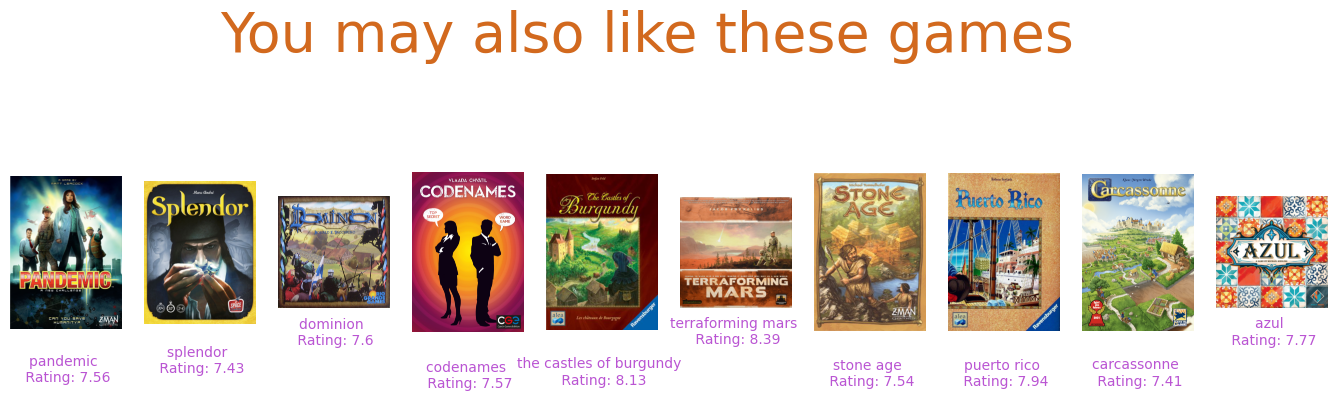

In [54]:
similar = get_similar_games('7 wonders', model)

### Implicit Alternating Least Squares

In [55]:
from implicit.als import AlternatingLeastSquares

In [56]:
factors = [16, 32]
iterations = [20, 30]


In [57]:

#обучим и посчитаем метриики для implicit.als

for train_idx, test_idx, info in folds_with_stats:
    #print(f"test range - from {info['Start date']} to {info['End date']}")
    train = ratings.loc[train_idx]
    test = ratings.loc[test_idx]
    #print(f'train shape - {train.shape}, test shape - {test.shape}')

    train_mat = get_coo_matrix(train).tocsr()

    for factor in factors:
        for iteration in iterations:
            
            als_model = AlternatingLeastSquares(factors = factor, iterations = iteration) 

            als_model.fit(train_mat, show_progress=False) 

            mapper = generate_implicit_recs_mapper(als_model, train_mat, top_N, users_mapping, items_inv_mapping)

            recs = pd.DataFrame({
                    'user_id': test['user_id'].unique()
                })
            recs['item_id'] = recs['user_id'].map(mapper)
            recs = recs.explode('item_id')
            recs['rank'] = recs.groupby('user_id').cumcount() + 1
            metrics = compute_metrics(test, recs, top_N)

            fold_result = pd.Series(metrics)
            fold_result.at['Date'] = info['Start date']
            fold_result.at['argv'] = f'factors={factor} iterations={iteration}'
            fold_result.at['Model'] = als_model.__class__.__name__

            validation_results = pd.concat([validation_results, fold_result], axis = 1, ignore_index=True)

/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:33: UserWarning: Intel MKL BLAS detected. Its highly recommend to set the environment variable 'export MKL_NUM_THREADS=1' to disable its internal multithreading
  warnings.warn(


In [58]:
validation_results.T

,Precision@1,Recall@1,Precision@2,Recall@2,Precision@3,Recall@3,Precision@4,Recall@4,Precision@5,Recall@5,...,Recall@8,Precision@9,Recall@9,Precision@10,Recall@10,MAP@10,MRR,Date,argv,Model
0,0.006711,0.003356,0.006711,0.003478,0.006711,0.004596,0.005034,0.004596,0.005369,0.007952,...,0.008074,0.003729,0.008074,0.004027,0.008196,0.004532,0.013647,2022-12-08,none,baseline
1,0.0,0.0,0.0,0.0,0.00463,0.003513,0.008681,0.007491,0.009722,0.014898,...,0.021885,0.007716,0.022753,0.007639,0.023384,0.004781,0.013561,2022-12-09,none,baseline
2,0.017045,0.006245,0.014205,0.007704,0.011364,0.007768,0.011364,0.008123,0.013636,0.014475,...,0.02209,0.00947,0.02209,0.009659,0.02247,0.009839,0.030208,2022-12-10,none,baseline
3,0.00565,0.000063,0.002825,0.000063,0.003766,0.000208,0.004237,0.001621,0.014689,0.025273,...,0.036886,0.010672,0.036949,0.009605,0.036949,0.006787,0.021435,2022-12-11,none,baseline
4,0.006494,0.00026,0.00974,0.002641,0.006494,0.002641,0.00487,0.002641,0.005195,0.00329,...,0.00329,0.003608,0.003448,0.003896,0.009942,0.002247,0.015657,2022-12-12,none,baseline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,0.0,0.0,0.0,0.0,0.066667,0.2,0.05,0.2,0.04,0.2,...,0.4,0.044444,0.4,0.04,0.4,0.1,0.1,2023-02-04,factors=32 iterations=30,AlternatingLeastSquares
1016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-02-05,factors=16 iterations=20,AlternatingLeastSquares
1017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-02-05,factors=16 iterations=30,AlternatingLeastSquares
1018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-02-05,factors=32 iterations=20,AlternatingLeastSquares


In [59]:
# итоговая таблица с сравнениями

validation_results.T.groupby(['Model', 'argv']).agg({
    'MRR': ['mean', 'std', 'min', 'max'],
    'MAP@10': ['mean', 'std', 'min', 'max'],
    'Recall@10': ['mean', 'std', 'min', 'max'],
})

MRR                 \
                                                      mean       std  min   
Model                   argv                                                
AlternatingLeastSquares factors=16 iterations=20  0.111937  0.043079  0.0   
                        factors=16 iterations=30  0.110059  0.048372  0.0   
                        factors=32 iterations=20  0.108681  0.041549  0.0   
                        factors=32 iterations=30  0.104626  0.038903  0.0   
BM25Recommender         K=20                      0.094776  0.033299  0.0   
CosineRecommender       K=20                      0.091387  0.031967  0.0   
TFIDFRecommender        K=20                      0.093082  0.033567  0.0   
baseline                none                      0.012347  0.010659  0.0   

                                                              MAP@10  \
                                                       max      mean   
Model                   argv                                           
AlternatingLeastSquares factors=16 iterations=20  0.266667  0.060635   
                        factors=16 iterations=30  0.333333  0.059132   
                        factors=32 iterations=20  0.236818  0.058236   
                        factors=32 iterations=30  0.236856  0.055491   
BM25Recommender         K=20                      0.200000  0.051491   
CosineRecommender       K=20                      0.200000  0.048355   
TFIDFRecommender        K=20                      0.202424  0.049928   
baseline                none                      0.036818  0.005091   

                                                                           \
                                                       std  min       max   
Model                   argv                                                
AlternatingLeastSquares factors=16 iterations=20  0.030976  0.0  0.228571   
                        factors=16 iterations=30  0.032050  0.0  0.228571   
                        factors=32 iterations=20  0.032529  0.0  0.228571   
                        factors=32 iterations=30  0.023999  0.0  0.130445   
BM25Recommender         K=20                      0.023730  0.0  0.200000   
CosineRecommender       K=20                      0.023082  0.0  0.200000   
TFIDFRecommender        K=20                      0.023485  0.0  0.200000   
baseline                none                      0.005897  0.0  0.028395   

                                                 Recall@10                 \
                                                      mean       std  min   
Model                   argv                                                
AlternatingLeastSquares factors=16 iterations=20  0.123708  0.051038  0.0   
                        factors=16 iterations=30  0.118714  0.053908  0.0   
                        factors=32 iterations=20  0.124794  0.055562  0.0   
                        factors=32 iterations=30  0.123820  0.052603  0.0   
BM25Recommender         K=20                      0.108602  0.041225  0.0   
CosineRecommender       K=20                      0.106348  0.044161  0.0   
TFIDFRecommender        K=20                      0.107123  0.042576  0.0   
baseline                none                      0.016863  0.016242  0.0   

                                                            
                                                       max  
Model                   argv                                
AlternatingLeastSquares factors=16 iterations=20  0.400000  
                        factors=16 iterations=30  0.400000  
                        factors=32 iterations=20  0.400000  
                        factors=32 iterations=30  0.400000  
BM25Recommender         K=20                      0.210231  
CosineRecommender       K=20                      0.213097  
TFIDFRecommender        K=20                      0.212670  
baseline                none                      0.091986

In [60]:
%%time
als_model = AlternatingLeastSquares(factors = 16, iterations = 30) 
als_model.fit(train_mat, show_progress=False)
als_model.save('als_model')

CPU times: user 1min 13s, sys: 9.91 s, total: 1min 23s
Wall time: 8min 10s


,col_id,similarity,item_id,title
0,391,1.000000,34635,stone age
1,60,0.982862,822,carcassonne
2,310,0.982491,3076,puerto rico
3,355,0.982097,13,catan
4,2,0.980321,68448,7 wonders
5,286,0.980031,30549,pandemic
6,121,0.976783,36218,dominion
7,376,0.973882,148228,splendor
8,365,0.970091,40692,small world
9,63,0.969947,84876,the castles of burgundy


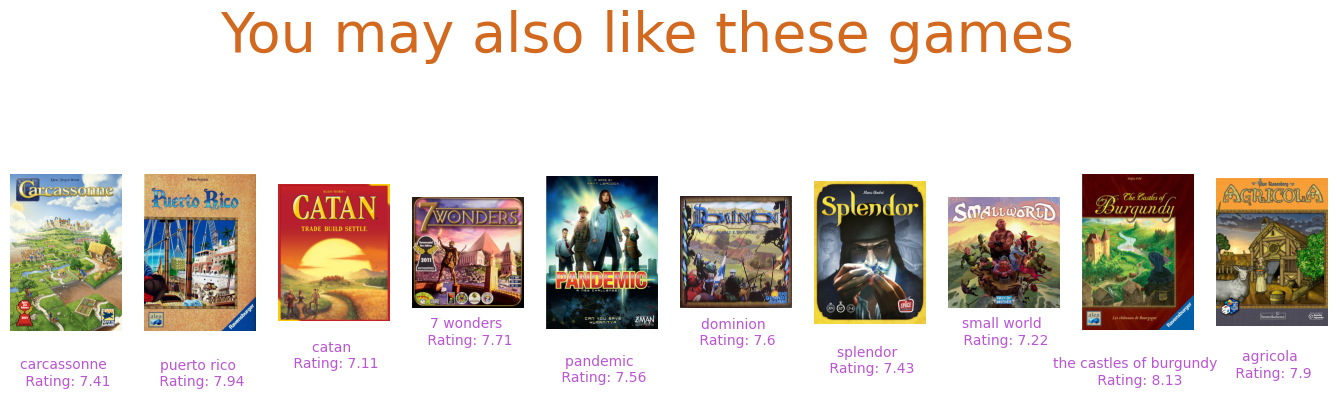

In [63]:
#теперь посмотрим, что нам рекомендует лучшая модель для игры stone age
get_similar_games('stone age', als_model)

In [181]:
similar_users = als_model.similar_users(6, N=5)
similar_users

(array([  6, 990, 769, 886, 705], dtype=int32),
 array([1.        , 0.9180493 , 0.91066813, 0.90919805, 0.90474826],
       dtype=float32))

In [65]:
similar_users = als_model.similar_users(453, N=5)

for uid, sim in zip(similar_users[0], similar_users[1]):

    user_id = users_inv_mapping[uid]
    print(f'User ID - {user_id} ({sim:.4f})')
    user_mask = train['user_id'] == user_id
    user_items = train.loc[user_mask, 'item_id'].map(item_titles.get)
    print(f'number of user items - {len(user_items)}')

User ID - paul10liao (1.0000)
number of user items - 1082
User ID - pboivin (0.9427)
number of user items - 1058
User ID - Pozman (0.9405)
number of user items - 1124
User ID - LookAtTheBacon (0.9404)
number of user items - 908
User ID - Joep83 (0.9402)
number of user items - 959
